In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("/content/Global_Cybersecurity_Threats_2015-2024.csv")

In [32]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [34]:
df.shape[0]

3000

In [35]:
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [36]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [37]:
df.dtypes

,0
Country,object
Year,int64
Attack Type,object
Target Industry,object
Financial Loss (in Million $),float64
Number of Affected Users,int64
Attack Source,object
Security Vulnerability Type,object
Defense Mechanism Used,object
Incident Resolution Time (in Hours),int64


<Axes: xlabel='Incident Resolution Time (in Hours)', ylabel='Attack Type'>

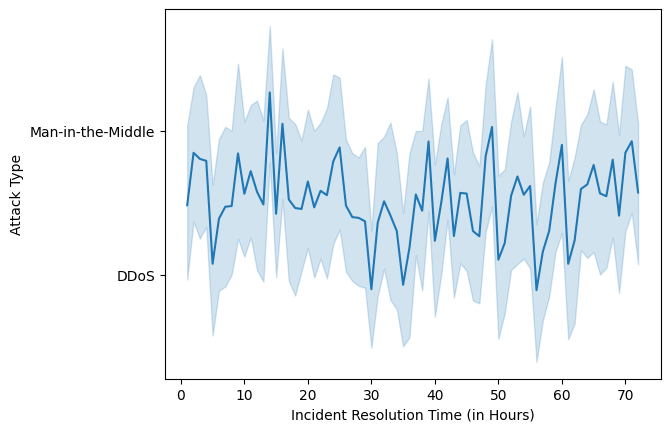

In [38]:
sns.lineplot(data=df,x="Incident Resolution Time (in Hours)",y="Attack Type")

In [39]:
df["Threat_Level"]=df["Incident Resolution Time (in Hours)"].apply(lambda x:"High" if x >20 else"Low")

In [40]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Threat_Level
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63,High
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71,High
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20,Low
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7,Low
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68,High


In [41]:
df.groupby("Threat_Level").count()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
Threat_Level,,,,,,,,,,
High,2163,2163,2163,2163,2163,2163,2163,2163,2163,2163
Low,837,837,837,837,837,837,837,837,837,837


In [45]:
df.groupby("Country")["Incident Resolution Time (in Hours)"].sum()

,Incident Resolution Time (in Hours)
Country,
Australia,10835
Brazil,11706
China,10509
France,11046
Germany,10481
India,11067
Japan,11315
Russia,10483
UK,11853


In [56]:
df['Attacks_per_country']=df['Country'].map(df['Country'].value_counts())

In [57]:
df.groupby("Country")["Attacks_per_country"].sum()

,Attacks_per_country
Country,
Australia,88209
Brazil,96100
China,78961
France,93025
Germany,84681
India,94864
Japan,93025
Russia,87025
UK,103041


In [58]:
from google.colab import files
df.to_csv('Global_Cybersecurity_Threats_2015-2024.csv')
files.download('Global_Cybersecurity_Threats_2015-2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>